### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

### Load the dataset

In [2]:
df=pd.read_csv("D:\\BJG Study Material\\Resource Person\\2020-21\\rait\\How Real Time Predictions are done with Machine Learning\\programs\\datasets\\Road-Accidents-2018-Annexure-1.csv")

### Exploratory Data Analysis and Data Preprocessing

#### Check few records

In [3]:
df.head()

,Years,Total Number of Road Accidents (in numbers),Total Number of Persons Killed (in numbers),Total Number of Persons Injured (in numbers),Population of India (in thousands),Total Number of Registered Motor Vehicles (in thousands),Road Length (in kms),Number of Accidents per Lakh Population,Number of Accidents per Ten Thousand Vehicles,Number of Accidents Per Ten Thousand Kms of Roads,Number of Persons Killed Per Lakh Population,Number of Persons Killed Per Ten Thousand Vehicles,Number of Persons Killed per Ten Thousand Kms of Roads,Number of Persons Injured per Lakh Population,Number of Persons Injured Per Ten Thousand Vehicles,Number of Persons Injured Per Ten Thousand Kms of Roads
0,1970,114100.0,14500.0,70100.0,539000.0,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7
1,1980,153200.0,24000.0,109100.0,673000.0,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3
2,1990,282600.0,54100.0,244100.0,835000.0,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4
3,1994,325864.0,64463.0,311500.0,904000.0,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5
4,1995,351999.0,70781.0,323200.0,924359.0,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4


#### Find out all features / columns

In [4]:
df.columns

Index(['Years', 'Total Number of Road Accidents (in numbers)',
       'Total Number of Persons Killed (in numbers)',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands)',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents Per Ten Thousand Kms of Roads',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles',
       'Number of Persons Killed per Ten Thousand Kms of Roads',
       'Number of Persons Injured per Lakh Population',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads'],
      dtype='object')

In [5]:
df.shape

(29, 16)

In [6]:
df.size

464

#### Select Only Required Features

In [7]:
mdf=df[['Years','Total Number of Persons Killed (in numbers)']]

In [8]:
mdf.head()

,Years,Total Number of Persons Killed (in numbers)
0,1970,14500.0
1,1980,24000.0
2,1990,54100.0
3,1994,64463.0
4,1995,70781.0


In [9]:
mdf.tail()

,Years,Total Number of Persons Killed (in numbers)
24,2015,146133.00
25,2016,150785.00
26,2017,147913.00
27,2018,151417.00
28,CAGR 2008/2018,2.36


In [10]:
mdf=mdf.drop(df.index[28])

In [11]:
mdf.tail()

,Years,Total Number of Persons Killed (in numbers)
23,2014,139671.0
24,2015,146133.0
25,2016,150785.0
26,2017,147913.0
27,2018,151417.0


#### Check for Missing Values

In [12]:
mdf.isna().sum()

Years                                          0
Total Number of Persons Killed (in numbers)    0
dtype: int64

#### there is no any categorical variables

#### There is only 1 input column, so no need of scaling

#### Now visulize the data for Analysis

Text(0, 0.5, 'No of People Died')

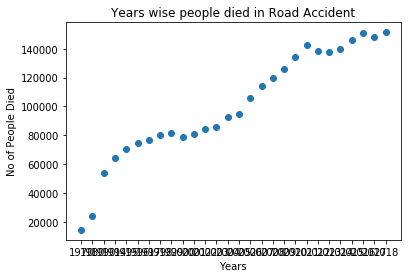

In [13]:
plt.scatter(mdf.Years,mdf[['Total Number of Persons Killed (in numbers)']])
plt.title("Years wise people died in Road Accident")
plt.xlabel("Years")
plt.ylabel("No of People Died")

by observing this graph, we can say there is linear relation between given 2 variables

y=mx+c
NO of people died = coef * years + intercept

#### Now divide dataset into x(input label) and y(output label)

In [14]:
x = mdf.iloc[:,:-1].values
y = mdf.iloc[:,-1].values
print(x)
print(y)

[['1970']
 ['1980']
 ['1990']
 ['1994']
 ['1995']
 ['1996']
 ['1997']
 ['1998']
 ['1999']
 ['2000']
 ['2001']
 ['2002']
 ['2003']
 ['2004']
 ['2005']
 ['2006']
 ['2007']
 ['2008']
 ['2009']
 ['2010']
 ['2011']
 ['2012']
 ['2013']
 ['2014']
 ['2015']
 ['2016']
 ['2017']
 ['2018']]
[ 14500.  24000.  54100.  64463.  70781.  74665.  76977.  79919.  81966.
  78911.  80888.  84674.  85998.  92618.  94968. 105749. 114444. 119860.
 125660. 134513. 142485. 138258. 137572. 139671. 146133. 150785. 147913.
 151417.]


#### Divide dataset into train and test

In [15]:
from sklearn.model_selection import train_test_split
# the train test split function split x and y into training and test set
# by random shuffle pf the rows. to keep this random shuffle constant for all of
# us we use the random state parametere
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                random_state=0)
print(x.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 1)
(28,)
(22, 1)
(6, 1)
(22,)
(6,)


#### Build the linear regression Model

In [16]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
model.coef_

array([3295.54902623])

In [18]:
model.intercept_

-6500298.630920932

In [19]:
model.predict([[2050]])

array([255576.87285741])

In [20]:
3295.54902623*2050-6500298.630920932

255576.87285056803

In [21]:
model.predict([[2017]])

array([146823.75499171])

In [22]:
mdf.tail()

,Years,Total Number of Persons Killed (in numbers)
23,2014,139671.0
24,2015,146133.0
25,2016,150785.0
26,2017,147913.0
27,2018,151417.0


#### Calculate the errors (MAE, MSE, RMSE, R2 Score)

In [23]:
y_pred = model.predict(x_test)

In [24]:
# predicting the output and calculating the errors
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [25]:
print(mae)
print(mse)
print(rmse)
print(r2)

6391.411726157491
59779316.51477196
7731.708512015437
0.9223722305876109


Text(0, 0.5, 'No of People Died')

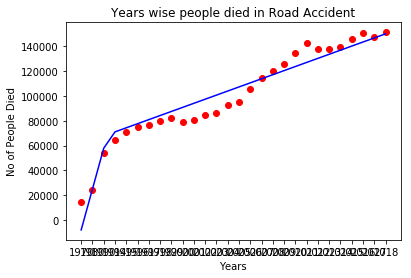

In [26]:
plt.scatter(mdf.Years,mdf[['Total Number of Persons Killed (in numbers)']],c='red')
plt.plot(mdf.Years,model.predict(mdf[['Years']]),c='b')
plt.title("Years wise people died in Road Accident")
plt.xlabel("Years")
plt.ylabel("No of People Died")

In [27]:
151417/365

414.84109589041094